# Introduction to the openPMD-viewer API

This notebook explains how to use the openPMD-viewer API, in order to access and plot the data stored in a set of openPMD files.

The openPMD-viewer API does not require the ipython notebook, and can be run in a normal Python environnement.
It can typically be used to write Python scripts, which perform pre-determined data analysis operations.

## (optional) Preparing this notebook to run it locally

If you choose to run this notebook on your local machine, you will need to download the openPMD data files which will then be visualized. To do so, and execute the following cell.

In [1]:
import os, wget, tarfile

def download_if_absent( dataset_name ):
    "Function that downloads and decompress a chosen dataset"
    if os.path.exists( dataset_name ) is False:
        tar_name = "%s.tar.gz" %dataset_name
        url = "https://github.com/openPMD/openPMD-example-datasets/raw/draft/%s" %tar_name
        wget.download( url )
        with tarfile.open( tar_name ) as tar_file:
            tar_file.extractall()
        os.remove( tar_name )

download_if_absent( 'example-2d' )

In addition, we choose here to incorporate the plots inside the notebook.

In [2]:
%matplotlib inline

## Preparing the API

In order to start using the API:

- Load the class `OpenPMDTimeSeries` from the module `opmd_viewer`

In [3]:
from opmd_viewer import OpenPMDTimeSeries

- Create a time series object by pointing to the folder which contains the corresponding openPMD data

In [4]:
ts = OpenPMDTimeSeries('./example-2d/hdf5/')

## Using the API for the fields

### Accessing the field data

The fields can be read with the method `get_field`. 

The user can either require a time (in seconds) or an iteration (an integer). When giving a time, it is not needed to provide the exact time of an available iteration, as the time of the closest available value will be used instead.

In [5]:
# One example
rho, info_rho = ts.get_field( iteration=100, field='rho' )
# Another example
Ex, info_Ex = ts.get_field( t=100.e-15,  field='E', coord='x' )

The method `get_field` returns two quantities:
- A 2D array containing the values of the requested field.
- A object containing metainformation about the extent of the grid.

These two objects can then be used in a Python environnement to perform numerical analysis.

### Plotting the field data 

A user could directly plot the extracted array `Ex` by using e.g. matplotlib's `imshow`.

However, for convenience, openPMD-viewer can also directly plot the data, if the argument `plot = True` is used.

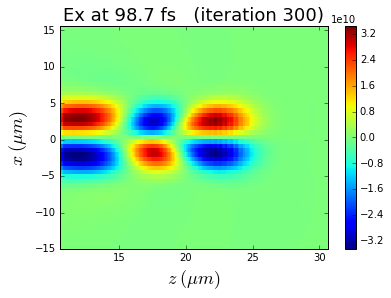

In [6]:
Ex, info_Ex = ts.get_field( t=100.e-15,  field='E', coord='x', plot=True )

### Missing or inconsistent argument

If an argument is missing or inconsistent, a helper message will be printed.

In [7]:
E, info_E = ts.get_field( field='E' )

The field E is a vector field, but the `coord` argument is missing or erroneous.
The available coordinates are: 
 - x
 - y
 - z
Please set the `coord` argument accordingly.


In [8]:
Ex, info_Ex = ts.get_field( field='bogus_field', coord='x' )

The `field` argument is missing or erroneous.
The available fields are: 
 - J
 - B
 - E
 - rho
Please set the `field` argument accordingly.


### Additional documentation

Additional documentation on `get_field` can be obtained by reading its docstring. This can be done for instance by executing the following command in an IPython environnement.

In [9]:
ts.get_field?

Moreover, additional documentation about the meta-information object which is returned by get_field can be obtained by adding `?` after any metainformation object. For instance:

In [10]:
info_rho?

## API for the particles

### Accessing the particle data

The particle quantities can be read by using the method `get_particle`. 

Again, the user can give either a physical time, or an iteration. Additionally, the user can request several particle quantities simultaneously, by passing a list of requested quantities (`var_list`). The method `get_particle` then returns a list of 1darray (one per requested quantity in `var_list`, returned in the same order). These 1darrays have one element per macroparticle.

In [11]:
# One example: extracting several quantities
x, uz, w = ts.get_particle( var_list=['x','uz', 'w'], iteration=100, species='ions') 
# Another example: extracting 1 quantity 
# (notice the comma after z, so that z is a 1darray, not a list)
z, = ts.get_particle( var_list=['z'], t=150.e-15, species='electrons')

### Plotting the particle data

The openPMD-viewer provides plotting support when the argument `plot = True` is set:

- When only one quantity is requested, a histogram of this quantity is plotted. (This histogram takes into account the weight of the macroparticles.)

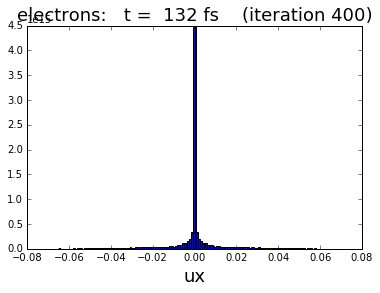

In [12]:
ux = ts.get_particle( var_list=['ux'], iteration=400, species='electrons', plot=True )

- When two quantities are requested, a 2d histogram is plotted. (It also takes into account the weight of the macroparticles.)

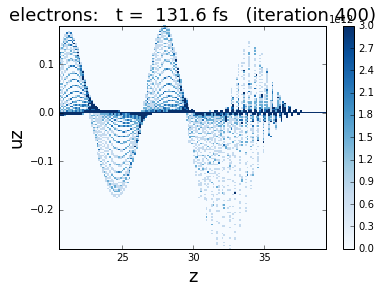

In [13]:
z, uz = ts.get_particle( var_list=['z','uz'], iteration=400, species='electrons', plot=True, vmax=3e12 )

### Missing or inconsistent arguments

As for the fieds, if an argument is missing or inconsistent, a helper message will be printed.

In [14]:
data_list = ts.get_particle( var_list=['z'], t=150.e-15 )

The argument `species` is missing or erroneous.
The available species are: 
 - electrons
 - ions
Please set the argument `species` accordingly.


In [15]:
data_list = ts.get_particle( var_list=['bogus_quantity'], t=150.e-15, species='electrons' )

The argument `var_list` is missing or erroneous.
It should be a list of strings representing particle quantities.
 The available quantities are: 
 - charge
 - mass
 - x
 - y
 - z
 - ux
 - uy
 - uz
 - w
Please set the argument `var_list` accordingly.


### Additional documentation

As for the `get_field` method, the documentation on `get_particle` can be obtained by reading its docstring. This can be done for instance by executing the following command in an IPython environnement.

In [16]:
ts.get_particle?

## Continue this tutorial

- To learn more about mesh geometries and the corresponding API, look at the notebook `2_Specific-field-geometries`.

- To learn about the openPMD-viewer GUI, look at the notebook `3_Introduction-to-the-GUI`.